In [1]:
import os
import numpy as np
import pandas as pd
import altair as alt
import pywt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [5]:
# NAME OF FILE AFTER CONVERTING TO REQUIRED FORMAT USING 'Process.ipynb'
filename = 'aavash1'
filepath = '../Data/Processed Data/'+f'{filename}'+'_processed.csv'

#No. OF DATA SUBCARRIERS
SUBCARRIES_NUM = 52

In [6]:
def read_csi_data_from_csv(path_to_csv):
    file = pd.read_csv(path_to_csv, header=None).values

    # CONVERT CSV TO DATAFRAME WITH FLOATING POINT VALUES
    data = pd.DataFrame(file).apply(pd.to_numeric, errors='coerce').values
    # CONVERT 'Nan' VALUES IN DATAFRAME TO 0.0
    data = np.nan_to_num(data)

    # data_len = data.shape[0]
    antenna_pair = 1
    # display(data_len)
    subcarries_num = SUBCARRIES_NUM
    amplitudes = data[:, subcarries_num*1:subcarries_num*(1 + antenna_pair)]
    amp_dat = pd.DataFrame(amplitudes)
    display(amp_dat)
    display(len(amp_dat.columns))
    phases = data[:, subcarries_num*(1 + antenna_pair):subcarries_num*(1 + 2*antenna_pair)]
    phase_dat = pd.DataFrame(phases)
    display(phase_dat)
    
    return amplitudes, phases

In [7]:
experiments_data = []
amplitudes, phases = read_csi_data_from_csv(filepath)
experiments_data.append([amplitudes, phases])
# display(experiments_data[0][0][0])

#EXPERIMENT_DATA[0][0] --> AMPLITUDES
#EXPERIMENT_DATA[0][0] --> PHASES

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,210.342578,283.622989,318.025156,273.738927,164.684547,88.102213,228.740027,454.394102,628.411489,749.230272,...,542.071951,685.631096,821.922746,933.332202,956.174147,943.716059,855.851623,690.047100,494.494692,234.795656
1,461.885267,595.242808,696.715867,697.906154,654.129192,634.527383,473.769986,426.957843,357.531817,323.562977,...,666.985007,587.766110,463.314148,382.989556,321.547819,305.221231,401.997512,461.061818,483.566955,377.025198
2,362.829161,497.321827,538.075274,599.287911,530.292372,431.551851,327.844475,262.611881,237.033753,252.675681,...,668.025449,556.118692,484.753546,225.079986,242.942380,206.293480,290.270563,284.344861,351.445586,271.140185
3,345.950864,534.804637,590.181328,638.376848,598.579151,541.089641,373.108563,403.209623,280.178515,213.740497,...,546.772348,453.788497,361.653149,323.904307,291.979451,280.016071,299.813275,375.366488,336.005952,298.933103
4,479.087675,680.294054,686.865343,674.329296,514.186737,552.000906,645.864537,495.827591,435.690257,355.877788,...,876.132981,680.036028,502.152367,302.790357,237.103353,242.736483,389.178622,519.849978,481.702190,416.828502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,93.300589,87.281155,120.619236,255.431008,398.327754,549.421514,727.782935,766.381759,875.334222,876.002283,...,796.276962,813.910314,809.504169,763.000655,696.916781,629.584784,561.918144,442.485028,333.061556,180.113853
2233,339.330223,453.357475,565.099991,626.278692,621.579440,616.525750,600.201633,564.932739,552.602932,528.503548,...,624.945598,487.315093,440.477014,262.345192,341.502562,294.278779,458.981481,419.672491,438.511117,314.682380
2234,223.008968,165.583816,269.356641,292.385020,380.539091,483.321839,562.211704,679.155358,768.417204,830.086742,...,642.059187,639.282410,682.586991,763.288936,730.529945,724.189202,724.859297,636.440099,520.947214,291.382910
2235,197.253644,324.722959,256.908544,195.432853,284.114414,196.420467,137.931142,261.629509,436.033256,406.509532,...,332.453004,341.344401,358.468967,404.969135,188.281704,294.187015,294.187015,148.660687,219.822656,164.012195


52

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.057081,-0.180800,-0.656079,-1.125121,-1.479587,-0.458572,-0.260884,-0.741812,-1.263640,-1.825810,...,-1.368336,-2.188333,-2.944436,2.580040,1.959071,1.302686,0.654485,0.055097,-0.499831,-1.312389
1,1.716368,0.028564,-0.988765,-2.126206,3.121718,1.999902,0.791368,-0.136266,-0.970382,-1.827019,...,-2.102216,3.090530,2.036374,1.263083,0.460866,-0.271999,-0.958644,-1.895290,-2.834883,1.790041
2,-1.407460,-3.044925,2.151067,1.067588,-0.069830,-1.410219,-2.481620,2.934489,2.197421,0.974012,...,1.515381,0.295590,-0.718248,-1.597457,-2.648488,-3.088245,2.192247,1.300226,0.191815,-1.445069
3,-0.382117,-1.954080,-2.914286,2.293016,1.327844,0.424792,-0.667625,-1.538549,-2.178598,-2.871648,...,0.398168,-0.536640,-1.339231,-2.338729,-2.625845,3.130879,2.356194,1.485443,0.637549,-0.549025
4,-1.889247,-2.638492,-2.812476,-3.058451,2.821072,2.496280,2.578070,2.380441,2.378918,2.611293,...,-3.044423,-3.131299,3.073832,-2.664652,-3.112065,-2.624490,-2.654961,-2.572798,-2.692800,2.464978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,-1.875599,1.885301,1.362019,0.105902,-1.146454,-2.242695,2.874618,1.630855,0.512203,-0.641218,...,-2.550107,2.481627,1.222870,-0.001311,-1.276728,-2.554031,2.548654,1.229749,-0.111320,-1.682067
2233,-2.830093,2.880564,2.136711,1.673166,0.775160,0.245765,-0.641169,-1.126149,-1.851333,-2.294610,...,3.003543,2.452109,1.827889,0.777312,0.093841,-1.098030,-1.636205,-2.479505,-2.902145,2.367430
2234,1.358450,0.596378,0.495199,0.051325,-0.246891,-0.500668,-0.873553,-1.136126,-1.312876,-1.585253,...,2.351789,2.008557,1.686792,1.376998,1.082047,0.802974,0.568105,0.254125,-0.086489,-0.804813
2235,2.016305,2.089560,2.606514,-2.680233,-1.949342,-0.563996,0.116262,1.098602,2.034444,2.584297,...,-0.715151,-0.521326,0.526066,0.996491,1.757776,2.953530,2.953530,-0.832981,-1.657338,-0.915101


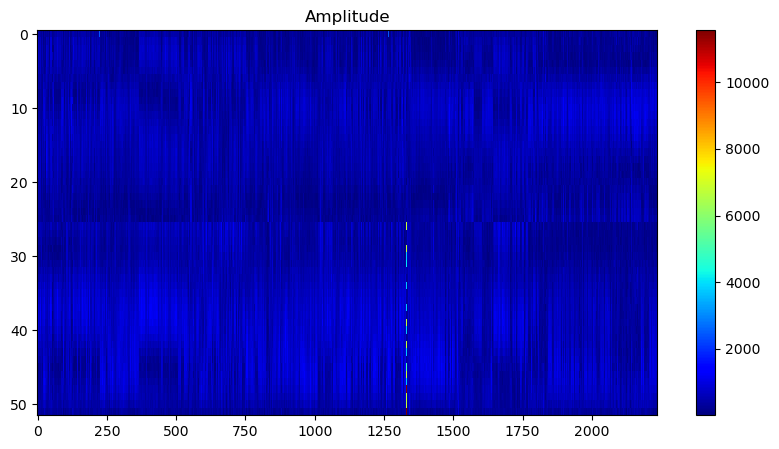

In [21]:
fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(311)
plt.imshow(amplitudes[:,0:52].T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

In [16]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(amplitudes):

    constant_offset = np.empty_like(amplitudes)
    filtered_data = np.empty_like(amplitudes)

    for i in range(1, len(amplitudes[0])):
        constant_offset[:,i] = moving_average(amplitudes[:,i], 10)

    filtered_data = amplitudes - constant_offset

    for i in range(1, len(amplitudes[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    
    cov_mat2 = np.cov(filtered_data.T)
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)

    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]

    pca_data2 = filtered_data.dot(eig_vec2)
    xmin = 0
    xmax = 20000

    fig1 = plt.figure(figsize = (18,20))
    
    ax1 = plt.subplot(811)
    plt.plot(pca_data2[xmin:xmax,0])
    ax1 = plt.title("PCA 1st component")
    plt. show()

    fig2 = plt.figure(figsize = (18,20))

    ax2 = plt.subplot(812)
    plt.plot(pca_data2[xmin:xmax,1])
    #plt.plot(pca_data2[2500:17500,1])
    ax2.set_title("PCA 2nd component")

    plt.show()

    fig3 = plt.figure(figsize = (18,20))
    
    ax3 = plt.subplot(813)
    plt.plot(pca_data2[xmin:xmax,2])
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 3rd component")

    plt.show()

    fig3 = plt.figure(figsize = (18,20))

    ax3 = plt.subplot(814)
    plt.plot(pca_data2[xmin:xmax,3])
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 4 component")

    plt.show()

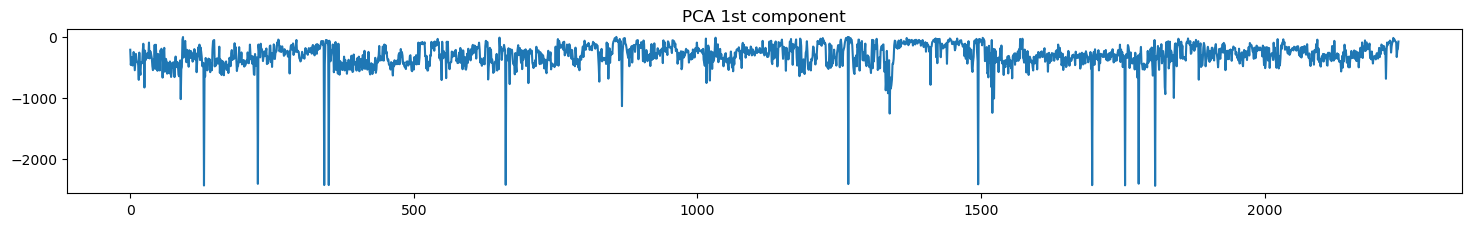

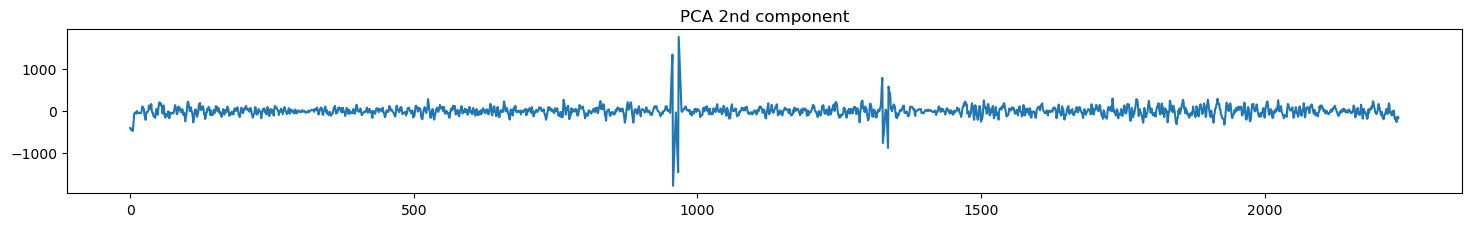

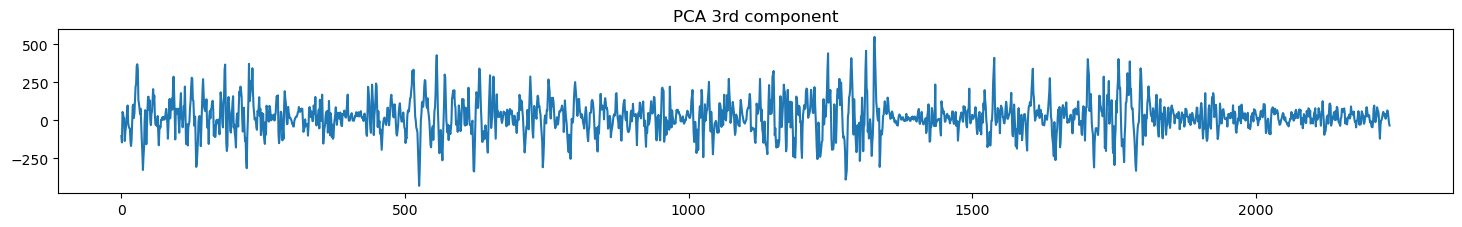

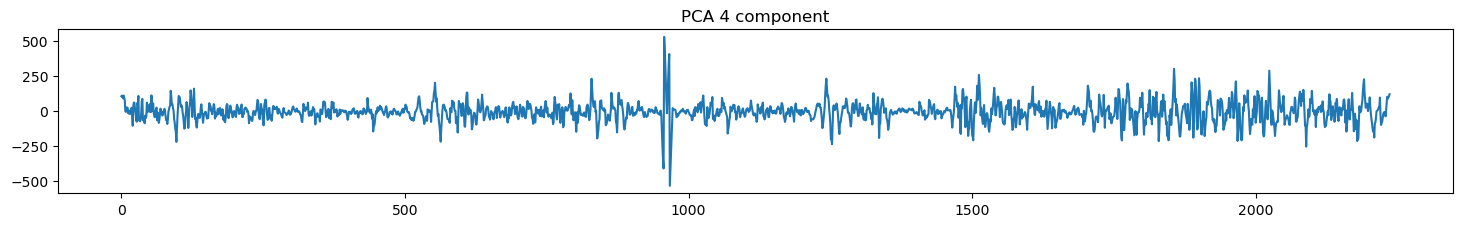

In [17]:
visualize(amplitudes)

In [18]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(amplitudes):

    constant_offset = np.empty_like(amplitudes)
    filtered_data = np.empty_like(amplitudes)

    for i in range(1, len(amplitudes[0])):
        constant_offset[:,i] = moving_average(amplitudes[:,i], 10)

    filtered_data = amplitudes - constant_offset

    for i in range(1, len(amplitudes[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    
    cov_mat2 = np.cov(filtered_data.T)
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)

    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]

    pca_data2 = filtered_data.dot(eig_vec2)
    xmin = 0
    xmax = 20000

    plt.figure(figsize = (18,30))
    # Spectrogram(STFT)
    plt.subplot(211)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,0], NFFT=128, Fs=500, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,1], NFFT=128, Fs=500, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,2], NFFT=128, Fs=500, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,3], NFFT=128, Fs=500, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,10))
    ax = plt.subplot(111)
    # ax.magnitude_spectrum(pca_data2[:,0], Fs=1000, scale='dB', color='C1')
    ax.magnitude_spectrum(pca_data2[:,0], Fs=500, color='C1')
    plt.xlim(0,100)
    plt.ylim(0,1000)
    plt.show()

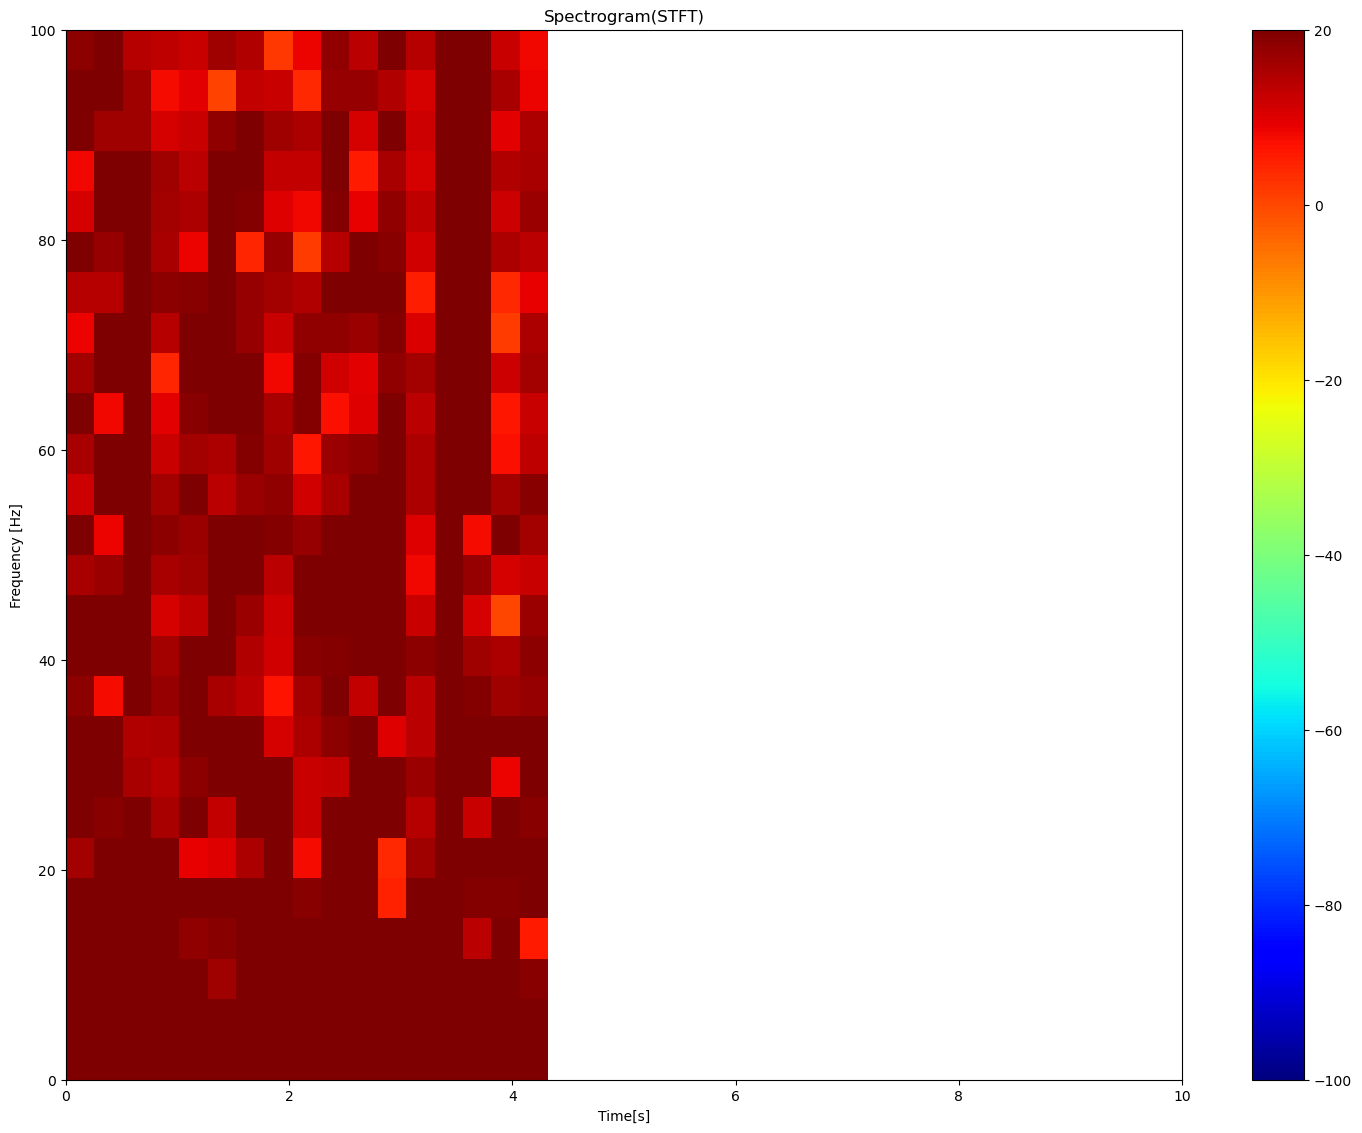

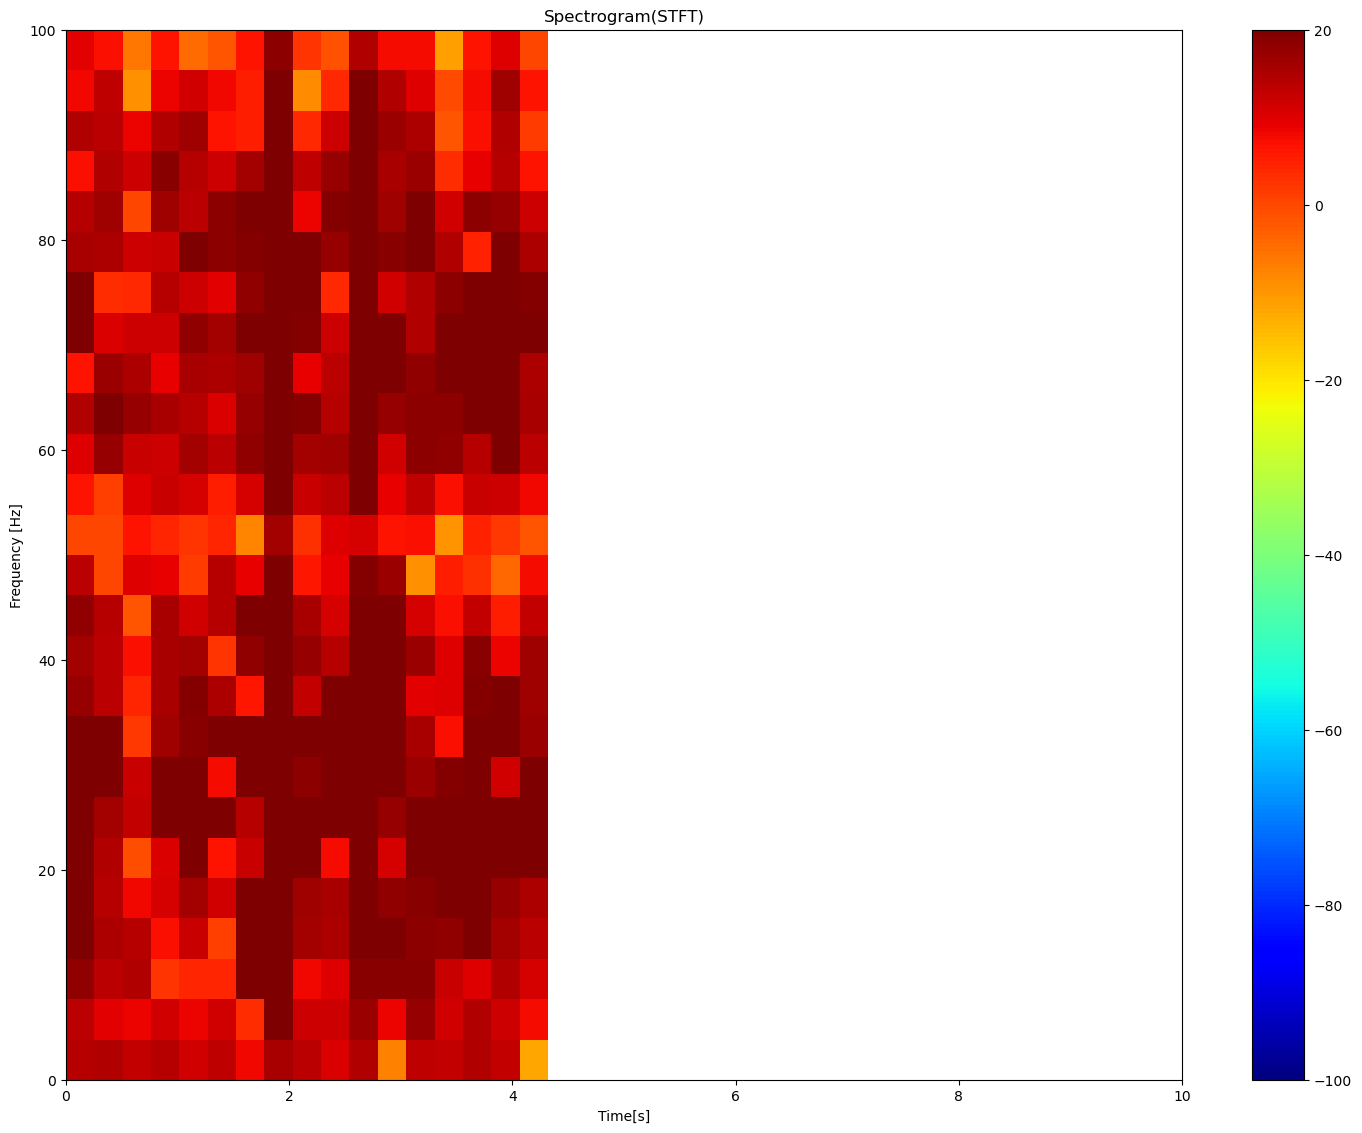

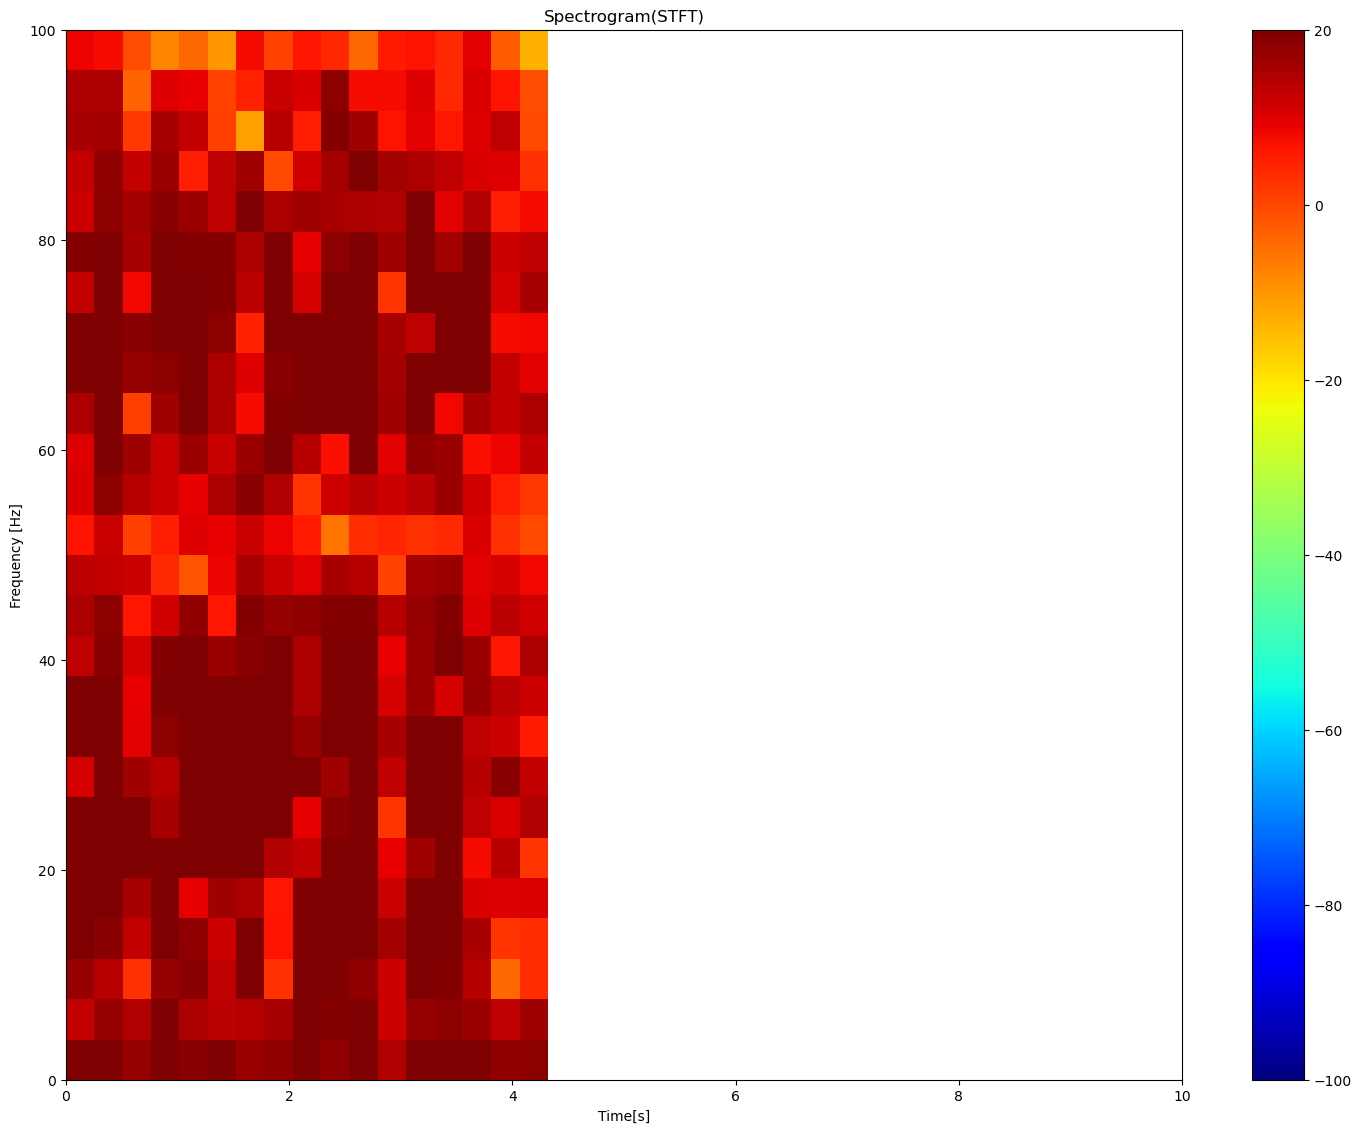

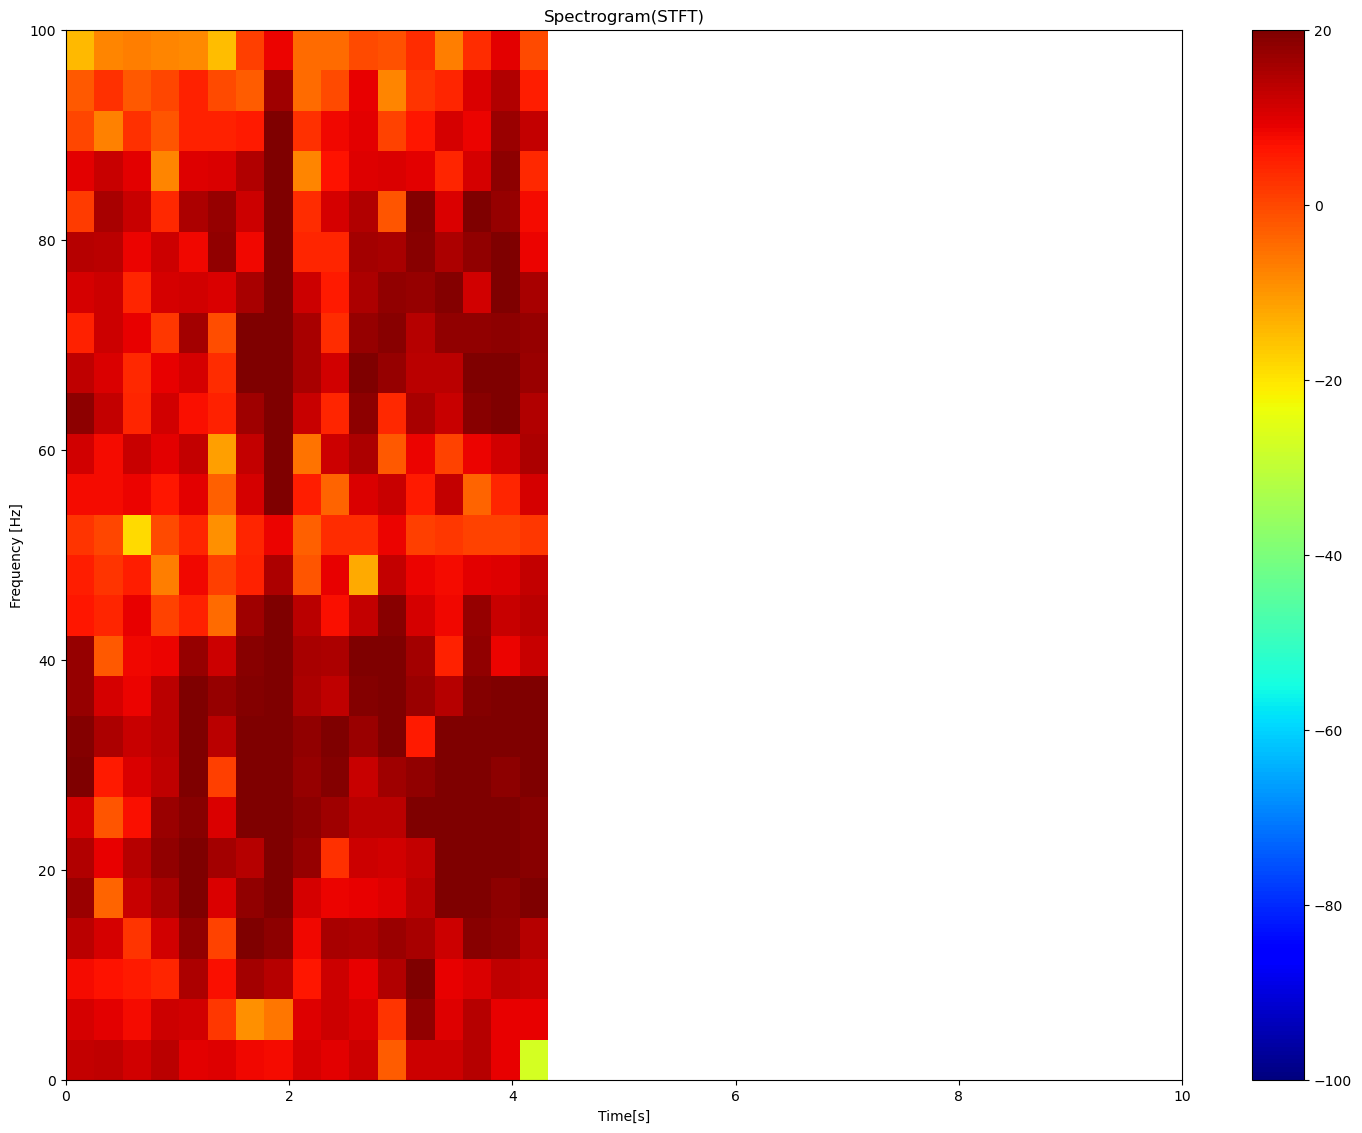

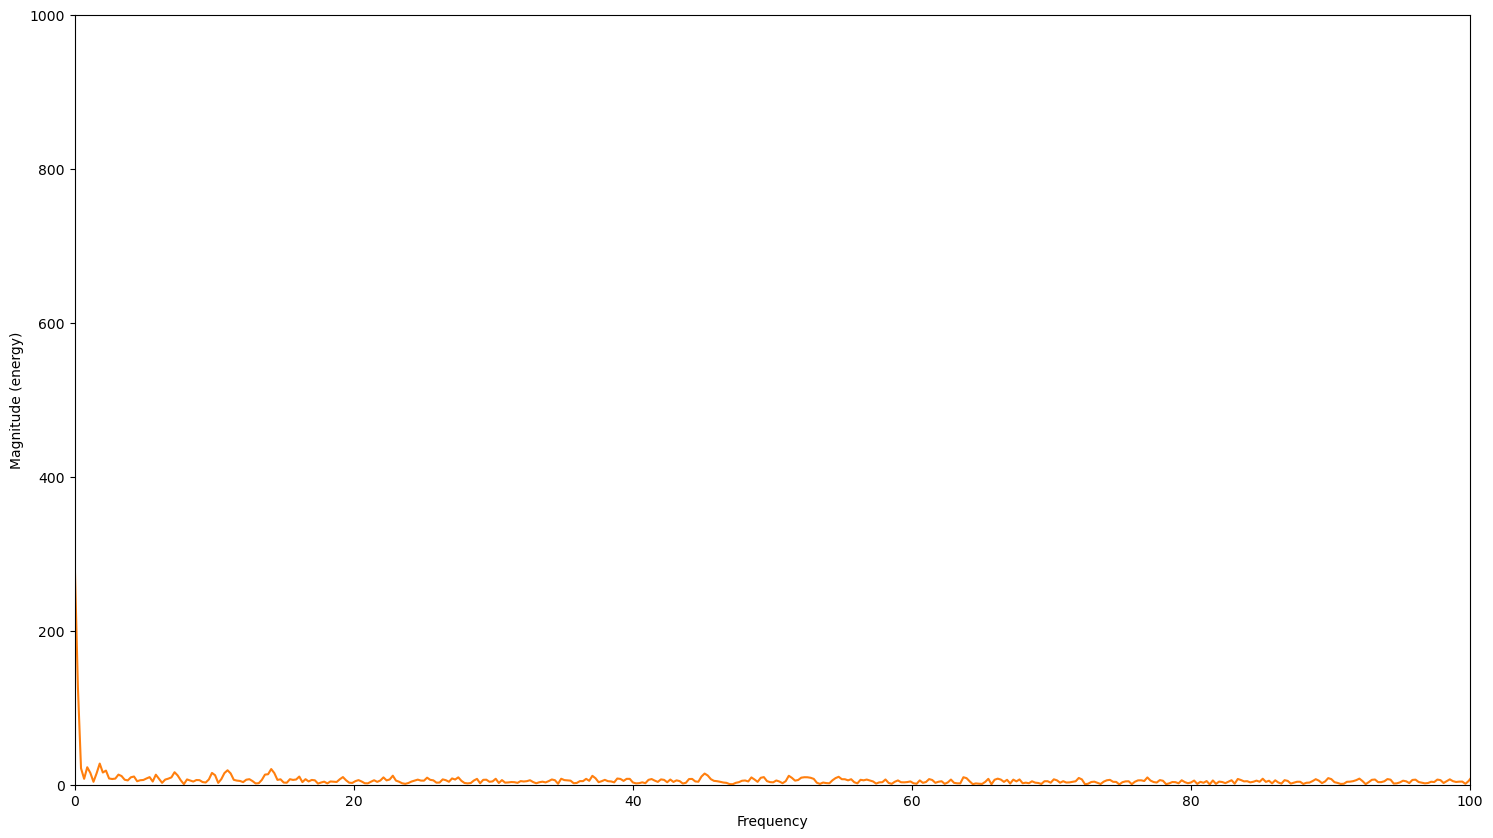

In [19]:
visualize(amplitudes)

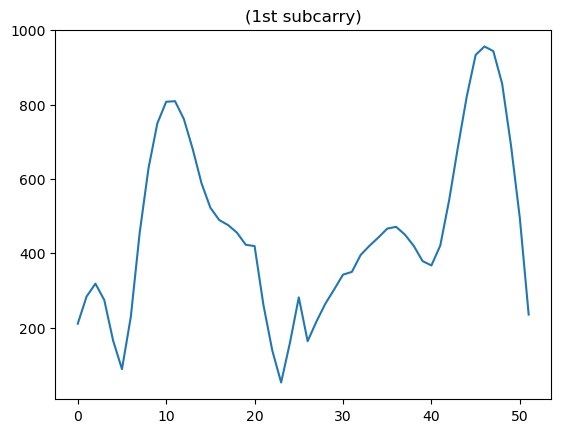

In [20]:
ax3 = plt.subplot(111)
plt.plot(amplitudes[0])
ax3 = plt.title("(1st subcarry)")
plt.show()